In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import pandas as pd
import numpy as np 
import seaborn as sns
%matplotlib inline
import json

#### Plot the proportion of the amount of times a pair of diseases appeared in a document / the number of documents in those disease categories
Shows heatmap and then dataframe

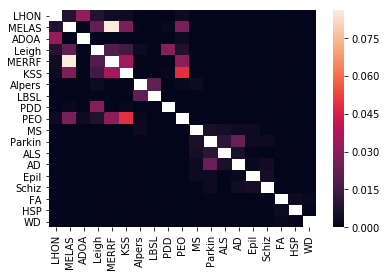

In [2]:
cell2pmid = json.load(open('../../data/textcube_cell2pmid.json'))
names = json.load(open('../.././config/textcube_config.json'))
dfProp = pd.read_csv('Data/pmidProportions.csv', index_col = 0); D = []
for i in range(0, len(dfProp)): d = {}; d['%i'%i] = str(names[i]); D.append(d)
for i in range(0,len(dfProp)): dfProp = dfProp.rename(columns = D[i])
dfProp.index = names
sns.heatmap(dfProp, annot=False);

In [3]:
dfProp

,LHON,MELAS,ADOA,Leigh,MERRF,KSS,Alpers,LBSL,PDD,PEO,MS,Parkin,ALS,AD,Epil,Schiz,FA,HSP,WD
LHON,NaN,0.008,0.032,0.008,0.004,0.003,0.000,0.000,0.000,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000
MELAS,0.008,NaN,0.000,0.022,0.086,0.027,0.001,0.000,0.002,0.026,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
ADOA,0.032,0.000,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Leigh,0.008,0.022,0.000,NaN,0.018,0.015,0.003,0.001,0.029,0.007,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.001,0.001
MERRF,0.004,0.086,0.000,0.018,NaN,0.035,0.001,0.000,0.001,0.030,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
KSS,0.003,0.027,0.000,0.015,0.035,NaN,0.001,0.000,0.002,0.049,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000
Alpers,0.000,0.001,0.000,0.003,0.001,0.001,NaN,0.021,0.000,0.002,0.003,0.000,0.000,0.000,0.001,0.000,0.001,0.001,0.001
LBSL,0.000,0.000,0.000,0.001,0.000,0.000,0.021,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001
PDD,0.000,0.002,0.000,0.029,0.001,0.002,0.000,0.000,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000
PEO,0.003,0.026,0.003,0.007,0.030,0.049,0.002,0.000,0.000,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


#### The number of times that a disease pair is studied in the same publication
Note: This is not the same as the amount of documents. Some documents may study more than 2 diseases. For example, if a document studies disease A, B, and C, the counts will increment for 3 pair: AB, BC, AC

In [4]:
df = pd.read_csv('Data/pmidOverlaps.csv', index_col = 0); D = []
for i in range(0, len(df)): d = {}; d['%i'%i] = str(names[i]);   D.append(d)

for i in range(0,len(df)):  df = df.rename(columns = D[i])
df.index = names; dfOver = df; dfOver

,LHON,MELAS,ADOA,Leigh,MERRF,KSS,Alpers,LBSL,PDD,PEO,MS,Parkin,ALS,AD,Epil,Schiz,FA,HSP,WD
LHON,NaN,18.0,42.0,17.0,6.0,5.0,0.0,0.0,0.0,5.0,29.0,2.0,1.0,1.0,11.0,2.0,5.0,0.0,0.0
MELAS,18.0,NaN,0.0,52.0,146.0,54.0,5.0,0.0,3.0,50.0,2.0,4.0,0.0,3.0,47.0,1.0,1.0,0.0,1.0
ADOA,42.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
Leigh,17.0,52.0,0.0,NaN,26.0,27.0,11.0,2.0,43.0,12.0,2.0,2.0,0.0,0.0,28.0,3.0,2.0,2.0,4.0
MERRF,6.0,146.0,0.0,26.0,NaN,37.0,4.0,0.0,1.0,28.0,1.0,2.0,0.0,0.0,47.0,0.0,0.0,0.0,0.0
KSS,5.0,54.0,0.0,27.0,37.0,NaN,3.0,0.0,2.0,61.0,0.0,3.0,0.0,1.0,16.0,0.0,4.0,0.0,1.0
Alpers,0.0,5.0,0.0,11.0,4.0,3.0,NaN,76.0,0.0,6.0,157.0,10.0,5.0,11.0,101.0,19.0,3.0,3.0,8.0
LBSL,0.0,0.0,0.0,2.0,0.0,0.0,76.0,NaN,0.0,0.0,18.0,3.0,3.0,9.0,11.0,23.0,1.0,1.0,5.0
PDD,0.0,3.0,0.0,43.0,1.0,2.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,2.0,15.0,0.0,4.0,0.0,0.0
PEO,5.0,50.0,3.0,12.0,28.0,61.0,6.0,0.0,0.0,NaN,5.0,3.0,0.0,1.0,8.0,0.0,1.0,0.0,0.0


### The combined number of documents in both categories on the column and row
This type of data was used in calculating proportions

In [5]:
df = pd.read_csv('Data/pmidSizes.csv', index_col = 0)
D = []
for i in range(0, len(df)):  d = {}; d['%i'%i] = str(names[i]); D.append(d)

for i in range(0,len(df)): df = df.rename(columns = D[i]); df.index = names; dfSizes = df
dfSizes

,LHON,MELAS,ADOA,Leigh,MERRF,KSS,Alpers,LBSL,PDD,PEO,MS,Parkin,ALS,AD,Epil,Schiz,FA,HSP,WD
LHON,NaN,2332.0,1299.0,2091.0,1379.0,1675.0,3363.0,2236.0,1399.0,1570.0,61197.0,69373.0,20427.0,97723.0,113942.0,107093.0,3586.0,2390.0,6886.0
MELAS,2332.0,NaN,1623.0,2415.0,1703.0,1999.0,3687.0,2560.0,1723.0,1894.0,61521.0,69697.0,20751.0,98047.0,114266.0,107417.0,3910.0,2714.0,7210.0
ADOA,1299.0,1623.0,NaN,1382.0,670.0,966.0,2654.0,1527.0,690.0,861.0,60488.0,68664.0,19718.0,97014.0,113233.0,106384.0,2877.0,1681.0,6177.0
Leigh,2091.0,2415.0,1382.0,NaN,1462.0,1758.0,3446.0,2319.0,1482.0,1653.0,61280.0,69456.0,20510.0,97806.0,114025.0,107176.0,3669.0,2473.0,6969.0
MERRF,1379.0,1703.0,670.0,1462.0,NaN,1046.0,2734.0,1607.0,770.0,941.0,60568.0,68744.0,19798.0,97094.0,113313.0,106464.0,2957.0,1761.0,6257.0
KSS,1675.0,1999.0,966.0,1758.0,1046.0,NaN,3030.0,1903.0,1066.0,1237.0,60864.0,69040.0,20094.0,97390.0,113609.0,106760.0,3253.0,2057.0,6553.0
Alpers,3363.0,3687.0,2654.0,3446.0,2734.0,3030.0,NaN,3591.0,2754.0,2925.0,62552.0,70728.0,21782.0,99078.0,115297.0,108448.0,4941.0,3745.0,8241.0
LBSL,2236.0,2560.0,1527.0,2319.0,1607.0,1903.0,3591.0,NaN,1627.0,1798.0,61425.0,69601.0,20655.0,97951.0,114170.0,107321.0,3814.0,2618.0,7114.0
PDD,1399.0,1723.0,690.0,1482.0,770.0,1066.0,2754.0,1627.0,NaN,961.0,60588.0,68764.0,19818.0,97114.0,113333.0,106484.0,2977.0,1781.0,6277.0
PEO,1570.0,1894.0,861.0,1653.0,941.0,1237.0,2925.0,1798.0,961.0,NaN,60759.0,68935.0,19989.0,97285.0,113504.0,106655.0,3148.0,1952.0,6448.0


### The number of documents found with the row's disease (column 1), those documents which weren't studying any of the other diseases (column 2), and the proportion of col1/col2 (column 3)

In [8]:
diffdocs = pd.read_csv(r'Data/diffdocs.csv', index_col = 0)
avgPrimPcntRemoved = 0
avgSecPcntRemoved = 0

for i in range(0,11): avgPrimPcntRemoved += diffdocs.iloc[i,3]
avgPrimPcntRemoved /= 10

for i in range(11, len(diffdocs)): avgSecPcntRemoved += diffdocs.iloc[i,3]
avgSecPcntRemoved /= 9

print('Average Percent of Primary Mitochondrial Disease Documents Removed ', round(avgPrimPcntRemoved, 4))
print('Average Percent of Secondary Mitochondrial Disease Documents Removed   ', round(avgSecPcntRemoved, 4))

diffdocs.columns = ['Disease', 'Docs', 'Unique Docs', '%Non-Unique Docs']
for i in range(0,len(diffdocs)): diffdocs['%Non-Unique Docs'][i] = str(round(diffdocs['%Non-Unique Docs'][i]*100,4)) + '%'

Average Percent of Primary Mitochondrial Disease Documents Removed  0.208
Average Percent of Secondary Mitochondrial Disease Documents Removed    0.0476


/home/ubuntu/anaconda3/envs/caseolap/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/ubuntu/anaconda3/envs/caseolap/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [9]:
diffdocs

,Disease,Docs,Unique Docs,%Non-Unique Docs
0,LHON,1004,889,11.45%
1,MELAS,1328,1054,20.63%
2,ADOA,295,248,15.93%
3,Leigh,1087,921,15.27%
4,MERRF,375,171,54.4%
5,KSS,671,532,20.72%
6,Alpers,2359,1977,16.19%
7,LBSL,1232,1092,11.36%
8,PDD,395,329,16.71%
9,PEO,566,442,21.91%


### Returns the number of documents with abstracts, documents which were considered in this study

In [20]:
# Finds all PMIDs in PubMed with Abstracts, Finds PMIDs with Full Text
fin = open('../../../../../../caseolap/data/pubmed.json', 'r')    
total_pmids = 0
abstract_pmids = []
full_text_pmids =[]
for line in fin:
    #print(line)
    title = line.split("\"ArticleTitle\": ")[1].split(", \"Abstract\": ")[0]


"Analysis and realization of an active noise control system on DSP hardware using an fMRI bore model."


In [44]:
# Adapted from Vladimir Guevara
import pandas as pd
# Finds all PMIDs in PubMed with Abstracts, Finds PMIDs with Full Text
fin = open('../../../../../../caseolap/data/pubmed.json', 'r')    
total_pmids = 0
title_pmids = []
abstract_pmids = []
full_text_pmids =[]
for line in fin:
    
    title = line.split("\"ArticleTitle\": ")[1].split(", \"Abstract\": ")[0]
    # If there is a title, store the PMID
    if(title != "\"\""):
        pmid = int(line.split("PMID\": \"")[1].split("\", ")[0])
        title_pmids.append(pmid)
    
    abstract = line.split("\"Abstract\": ")[1].split(", \"MeshHeadingList\":")[0]
    # If there is anything in abstract, store the PMID
    if(abstract != "\"\""):
        pmid = int(line.split("PMID\": \"")[1].split("\", ")[0])
        abstract_pmids.append(pmid)
    
    full_text = line.split("\"full_text\": ")[1].split(", \"Journal\":")[0]    # If there is anything in full_text, store the PMID
    if(full_text != "\"\""):
        pmid = int(line.split("PMID\": \"")[1].split("\", ")[0])
        full_text_pmids.append(pmid)
    
    
    
    total_pmids += 1
    if(total_pmids % 1000000 == 0):
        print("Total PMIDs Sorted Through:", total_pmids, end = '\r')
        
print('\nTitle PMIDs: ', len(title_pmids))
print('Abstract PMIDs: ', len(abstract_pmids)) 
print('Full text PMIDs: ', len(full_text_pmids))





# Makes PMID list of PMIDs used in this study
usedpmidList_ = []
f_cat2pmid = open('../../data/entityfound_pmid2cell.txt')
i = 0
for line in f_cat2pmid:
    pmid = line.split('	')[0]
    cat = line.split('	')[1].split('\n')[0]
    if(pmid != 'doc_id'):
        usedpmidList_.append(pmid)
usedpmidList = pd.DataFrame(usedpmidList_)
usedpmidList.to_csv('./Data/usedpmidList.csv')
usedPMIDlist = pd.read_csv('./Data/usedpmidList.csv', index_col=0)
f_cat2pmid.close()



# Find how many PMIDs in the nd_mito2 index have abstracts, have full text
ND_pmidsDF = pd.read_csv('./Data/pmidList.csv', index_col=0); ND_pmids = []
for row in ND_pmidsDF.iterrows():
    ND_pmids.append(row[0])
print('\nND Mito PMIDs: ', len(ND_pmids))  # All PMIDs in current database

print('Titles in indexed database: ', len(set(title_pmids).intersection(ND_pmids)), '/', len(ND_pmids), ' = ', round(len(set(title_pmids).intersection(ND_pmids))/len(ND_pmids), 4)*100, '%')
print('Abstracts in indexed database: ', len(set(abstract_pmids).intersection(ND_pmids)), '/', len(ND_pmids), ' = ', round(len(set(abstract_pmids).intersection(ND_pmids))/len(ND_pmids), 4)*100, '%')
print('Full text in indexed database: ',len(set(full_text_pmids).intersection(ND_pmids)), '/', len(ND_pmids), ' = ', round(len(set(full_text_pmids).intersection(ND_pmids))/len(ND_pmids), 4)*100, '%\n')

# Find how many PMIDs *USED* in the nd_mito2 index have abstracts, have full text
ND_used_pmidsDF = pd.read_csv('./Data/usedpmidList.csv', index_col=0); ND_used_pmids = []
for row in ND_used_pmidsDF.iterrows():
    ND_used_pmids.append(row[0])
print('\nND Mito PMIDs Used: ', len(ND_used_pmids))  # All PMIDs in current database

print('Titles *used* in indexed database: ', len(set(title_pmids).intersection(set(ND_used_pmids))), '/', len(ND_used_pmids), ' = ', round(len(set(title_pmids).intersection(set(ND_used_pmids)))/len(ND_used_pmids), 4)*100, '%')
print('Abstracts *used* in indexed database: ', len(set(abstract_pmids).intersection(set(ND_used_pmids))), '/', len(ND_used_pmids), ' = ', round(len(set(abstract_pmids).intersection(set(ND_used_pmids)))/len(ND_used_pmids), 4)*100, '%')
print('Full text *used* in indexed database: ',len(set(full_text_pmids).intersection(set(ND_used_pmids))), '/', len(ND_used_pmids), ' = ', round(len(set(full_text_pmids).intersection(set(ND_used_pmids)))/len(ND_used_pmids), 4)*100, '%')


fin.close()

Total PMIDs Sorted Through: 33000000
Title PMIDs:  33169281
Abstract PMIDs:  22160660
Full text PMIDs:  54918

ND Mito PMIDs:  460932
Titles in indexed database:  451364 / 460932  =  97.92 %
Abstracts in indexed database:  199515 / 460932  =  43.29 %
Full text in indexed database:  0 / 460932  =  0.0 %


ND Mito PMIDs Used:  28336
Titles *used* in indexed database:  27404 / 28336  =  96.71 %
Abstracts *used* in indexed database:  14280 / 28336  =  50.4 %
Full text *used* in indexed database:  0 / 28336  =  0.0 %


In [52]:
fin = open('../../../../../../caseolap/data/pubmed.json', 'r')    
length = 0
for line in fin: length += 1
length

33169281

In [45]:
# Adapted from Vladimir Guevara
import pandas as pd
# Finds all PMIDs in PubMed with Abstracts, Finds PMIDs with Full Text
fin = open('../../../../../../caseolap/data/pubmed.json', 'r')    
total_pmids = 0
title_pmids = []
abstract_pmids = []
full_text_pmids =[]
for line in fin:
    
    title = line.split("\"ArticleTitle\": ")[1].split(", \"Abstract\": ")[0]
    # If there is a title, store the PMID
    if(title != "\"\""):
        pmid = int(line.split("PMID\": \"")[1].split("\", ")[0])
        title_pmids.append(pmid)
    
    abstract = line.split("\"Abstract\": ")[1].split(", \"MeshHeadingList\":")[0]
    # If there is anything in abstract, store the PMID
    if(abstract != "\"\""):
        pmid = int(line.split("PMID\": \"")[1].split("\", ")[0])
        abstract_pmids.append(pmid)
    
    full_text = line.split("\"full_text\": ")[1].split(", \"Journal\":")[0]    # If there is anything in full_text, store the PMID
    if(full_text != "\"\""):
        pmid = int(line.split("PMID\": \"")[1].split("\", ")[0])
        full_text_pmids.append(pmid)
    
    
    if(abstract == "\"\"" and title == "\"\""):
        print(line)
    
    
    total_pmids += 1
    if(total_pmids % 1000000 == 0):
        print("Total PMIDs Sorted Through:", total_pmids, end = '\r')
        
print('\nTitle PMIDs: ', len(title_pmids))
print('Abstract PMIDs: ', len(abstract_pmids)) 
print('Full text PMIDs: ', len(full_text_pmids))





# Makes PMID list of PMIDs used in this study
usedpmidList_ = []
f_cat2pmid = open('../../data/entityfound_pmid2cell.txt')
i = 0
for line in f_cat2pmid:
    pmid = line.split('	')[0]
    cat = line.split('	')[1].split('\n')[0]
    if(pmid != 'doc_id'):
        usedpmidList_.append(pmid)
usedpmidList = pd.DataFrame(usedpmidList_)
usedpmidList.to_csv('./Data/usedpmidList.csv')
usedPMIDlist = pd.read_csv('./Data/usedpmidList.csv', index_col=0)
f_cat2pmid.close()



# Find how many PMIDs in the nd_mito2 index have abstracts, have full text
ND_pmidsDF = pd.read_csv('./Data/pmidList.csv', index_col=0); ND_pmids = []
for row in ND_pmidsDF.iterrows():
    ND_pmids.append(row[0])
print('\nND Mito PMIDs: ', len(ND_pmids))  # All PMIDs in current database

print('Titles in indexed database: ', len(set(title_pmids).intersection(ND_pmids)), '/', len(ND_pmids), ' = ', round(len(set(title_pmids).intersection(ND_pmids))/len(ND_pmids), 4)*100, '%')
print('Abstracts in indexed database: ', len(set(abstract_pmids).intersection(ND_pmids)), '/', len(ND_pmids), ' = ', round(len(set(abstract_pmids).intersection(ND_pmids))/len(ND_pmids), 4)*100, '%')
print('Full text in indexed database: ',len(set(full_text_pmids).intersection(ND_pmids)), '/', len(ND_pmids), ' = ', round(len(set(full_text_pmids).intersection(ND_pmids))/len(ND_pmids), 4)*100, '%\n')

# Find how many PMIDs *USED* in the nd_mito2 index have abstracts, have full text
ND_used_pmidsDF = pd.read_csv('./Data/usedpmidList.csv', index_col=0); ND_used_pmids = []
for row in ND_used_pmidsDF.iterrows():
    ND_used_pmids.append(row[0])
print('\nND Mito PMIDs Used: ', len(ND_used_pmids))  # All PMIDs in current database

print('Titles *used* in indexed database: ', len(set(title_pmids).intersection(set(ND_used_pmids))), '/', len(ND_used_pmids), ' = ', round(len(set(title_pmids).intersection(set(ND_used_pmids)))/len(ND_used_pmids), 4)*100, '%')
print('Abstracts *used* in indexed database: ', len(set(abstract_pmids).intersection(set(ND_used_pmids))), '/', len(ND_used_pmids), ' = ', round(len(set(abstract_pmids).intersection(set(ND_used_pmids)))/len(ND_used_pmids), 4)*100, '%')
print('Full text *used* in indexed database: ',len(set(full_text_pmids).intersection(set(ND_used_pmids))), '/', len(ND_used_pmids), ' = ', round(len(set(full_text_pmids).intersection(set(ND_used_pmids)))/len(ND_used_pmids), 4)*100, '%')


fin.close()

Total PMIDs Sorted Through: 33000000
Title PMIDs:  33169281
Abstract PMIDs:  22160660
Full text PMIDs:  54918

ND Mito PMIDs:  460932
Titles in indexed database:  451364 / 460932  =  97.92 %
Abstracts in indexed database:  199515 / 460932  =  43.29 %
Full text in indexed database:  0 / 460932  =  0.0 %


ND Mito PMIDs Used:  28336
Titles *used* in indexed database:  27404 / 28336  =  96.71 %
Abstracts *used* in indexed database:  14280 / 28336  =  50.4 %
Full text *used* in indexed database:  0 / 28336  =  0.0 %
